## **Task1&Task2 数据读取与数据分析**

赛题数据是文本数据，每个新闻是不定长的，使用csv格式进行存储。因此可以直接用`Pandas`完成数据读取的操作。

In [1]:
import pandas as pd
train_df = pd.read_csv(r'train_set.csv', sep='\t')

`pd.read_csv`常用参数：
- 读取的文件路径，这里需要根据改成你本地的路径，可以使用相对路径或绝对路径；
- 分隔符`sep`，为每列分割的字符，设置为`\t`即可；
- 读取行数`nrows`，为此次读取文件的函数，是数值类型（由于数据集比较大，可以先设置为100）；

In [2]:
train_df.head(5)

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


同样的方法加载测试集数据。

In [4]:
test_df = pd.read_csv(r'test_a.csv', sep='\t')

In [5]:
test_df.head(5)

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...


### **数据分析**
读取完训练集后，初步查看数据格式后，可以对数据集进行数据分析的操作。

读取了所有的训练集数据，从下面几个角度对数据集进行数据分析：

- 赛题数据中，新闻文本的长度是多少？
- 赛题数据中，字符分布是怎么样的？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，不同类别的文本长度分布如何？
- 赛题数据中，不同类别的字符分布是怎么样的？

#### **统计数据集中所有句子所包含字符的平均个数**

由上面的表格可以知道，训练集的每行句子的字符使用空格进行隔开，所以可以分割，然后统计单词的个数来得到每个句子的长度。

In [6]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


对新闻句子的统计可以得出，赛题的训练数据总共20w条，给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。其中75%以下的数据长度在1131以下。

下图将句子长度绘制了直方图，可见大部分训练集的句子的长度都几种在2000以内。

Text(0.5, 1.0, 'Histogram of char count')

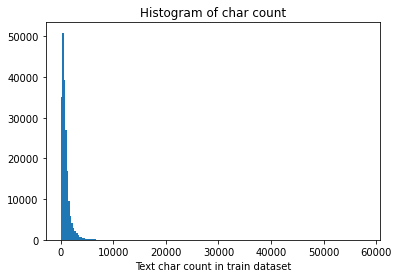

In [7]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count in train dataset')
plt.title("Histogram of char count")

Text(0.5, 1.0, 'Histogram of char count')

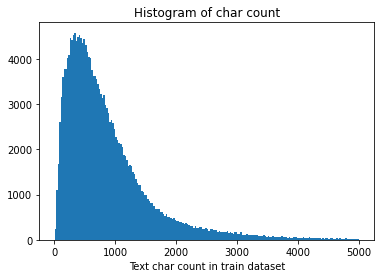

In [8]:
_ = plt.hist(train_df[train_df['text_len']<5000]['text_len'], bins=200)
plt.xlabel('Text char count in train dataset')
plt.title("Histogram of char count")

同样统计测试集文本长度：

In [9]:
%pylab inline
test_df['text_len'] = test_df['text'].apply(lambda x: len(x.split(' ')))
print(test_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    50000.000000
mean       909.844960
std       1032.313375
min         14.000000
25%        370.000000
50%        676.000000
75%       1133.000000
max      41861.000000
Name: text_len, dtype: float64


可见测试集共50,000条新闻，每条新闻平均909个字符，最短句子长度为14，最长句子41861,75%以下的数据长度在1133以下。

将测试集句子长度绘制了直方图：

Text(0.5, 1.0, 'Histogram of char count')

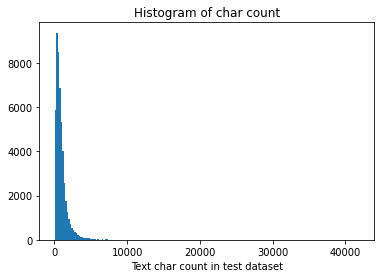

In [10]:
_ = plt.hist(test_df['text_len'], bins=200)
plt.xlabel('Text char count in test dataset')
plt.title("Histogram of char count")

Text(0.5, 1.0, 'Histogram of char count')

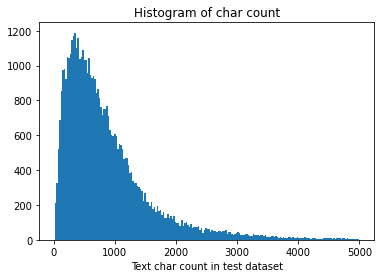

In [11]:
_ = plt.hist(test_df[test_df['text_len']<5000]['text_len'], bins=200)
plt.xlabel('Text char count in test dataset')
plt.title("Histogram of char count")

可以看到训练集和测试集的文本长度分布接近。

#### **字符分布统计**

接下来可以统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数。

从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少。

In [7]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0])

print(word_count[-1])

6869
('3750', 7482224)
('3133', 1)


还可以根据字在语料中的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [8]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])

print(word_count[1])

print(word_count[2])

('3750', 197997)
('900', 197653)
('648', 191975)


同样统计一下测试集的字符分布：

In [9]:
from collections import Counter
all_lines = ' '.join(list(test_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0])

print(word_count[-1])

6203
('3750', 1879488)
('1224', 1)


In [11]:
from collections import Counter
test_df['text_unique'] = test_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(test_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])

print(word_count[1])

print(word_count[2])

('3750', 49455)
('900', 49366)
('648', 47966)


#### **统计数据集中类别分布的规律**
接下来对数据集的类别进行分布统计，具体统计每类新闻的样本个数。
标签和对应的类别为：
{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

Text(0.5, 0, 'category')

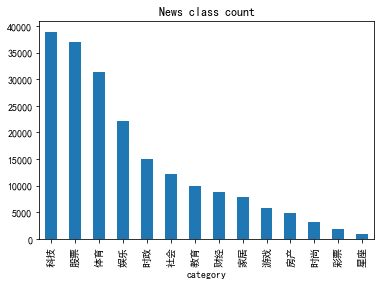

In [16]:
label2id={'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6,
          '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
id2label={}
for label,labelid in label2id.items():
    id2label[labelid]=label
train_df['type']=''
for labelid in np.unique(train_df['label'].values):
    train_df.loc[train_df['label']==labelid,'type']=id2label[labelid]
train_df['type'].value_counts().plot(kind='bar')

#注意这两行是为了正确显示中文设置的
plt.rcParams['font.sans-serif']=["SimHei"] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.title('News class count')
plt.xlabel("category")

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

#### **统计数据集中不同类别下句子平均字符的个数**
再统计一下训练集中不同类别下句子平均长度。

Text(0.5, 0, 'category')

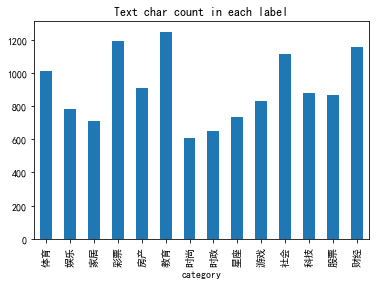

In [20]:
from collections import Counter
text_len_each_label=train_df.groupby('type').agg('mean','text_len')['text_len']
text_len_each_label.plot(kind='bar')
plt.title('Text char count in each label')
plt.xlabel("category")

可以看到各个类别的平均句子长度，教育类、caipiao的句子长度最长，时尚类的比较短。
#### **统计数据集中不同类别下句子中最常见的5个字符**

In [ ]:
from collections import Counter
label_groups=train_df.groupby('type')

word_count_each_label={}

for groupid in label_groups.groups.keys():
    group=label_groups.get_group(groupid)
    lines = ' '.join(list(group['text']))
    word_count = Counter(lines.split(" "))
    word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
    word_count_each_label[groupid]=word_count

In [38]:
word_count_df_each_label=pd.DataFrame.from_dict(word_count_each_label,orient='index').T

word_count_df_each_label.head(5)

,体育,娱乐,家居,彩票,房产,教育,时尚,时政,星座,游戏,社会,科技,股票,财经
0,"(3750, 1458331)","(3750, 774668)","(3750, 242367)","(3750, 87412)","(3750, 180259)","(3750, 469540)","(3750, 83834)","(3750, 360839)","(3750, 33796)","(3750, 178783)","(3750, 715740)","(3750, 1267331)","(3750, 1200686)","(3750, 428638)"
1,"(648, 974639)","(648, 494477)","(648, 202399)","(4464, 51426)","(648, 114512)","(648, 345372)","(648, 67353)","(648, 231863)","(648, 26867)","(648, 157291)","(648, 329051)","(648, 967653)","(648, 714152)","(648, 262220)"
2,"(900, 618294)","(900, 298663)","(900, 92207)","(3370, 45815)","(900, 75185)","(900, 222488)","(900, 37240)","(900, 190842)","(900, 11263)","(900, 70680)","(900, 305241)","(900, 577742)","(3370, 626708)","(900, 184131)"
3,"(7399, 351894)","(6122, 187933)","(6122, 57345)","(648, 37041)","(3370, 67780)","(6248, 193757)","(4939, 18591)","(4411, 120442)","(4939, 9651)","(7328, 46477)","(6122, 159125)","(3370, 503768)","(900, 542884)","(3370, 159156)"
4,"(6122, 343850)","(4939, 173606)","(4939, 56147)","(2465, 36610)","(2465, 45163)","(2555, 175234)","(6122, 18438)","(7399, 86190)","(669, 8925)","(6122, 43411)","(5598, 136713)","(4464, 307431)","(4464, 445525)","(5296, 132136)"


#### **假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？**
利用re正则表达式实现多个字符对一个字符串进行分割。

In [41]:
import re

train_df['sentence_count']=train_df['text'].apply(lambda x: re.split('3750|900|648',x)).str.len()
train_df['sentence_count'].describe()

count    200000.000000
mean         80.802370
std          86.955448
min           1.000000
25%          29.000000
50%          57.000000
75%         103.000000
max        3460.000000
Name: sentence_count, dtype: float64

可以看到平均每个文本都由80个句子组成。

### **数据分析的结论**

通过上述分析可以知道数据集的大致状况：

1. 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
2. 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
3. 赛题总共包括7000-8000个字符；

还可以得出以下对训练有价值的结论：

1. 每个新闻平均字符个数较多，可能需要截断；
2. 由于类别不均衡，会严重影响模型的精度；
